In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df['HomeRemote'].value_counts()

A few days each month                                      15454
Never                                                      13975
All or almost all the time (I'm full-time remote)           4905
Less than half the time, but at least one day each week     4147
More than half, but not all, the time                       1909
It's complicated                                            1849
About half the time                                         1769
Name: HomeRemote, dtype: int64

In [3]:
df.drop(df[df['HomeRemote'] == 'It\'s complicated'].index, inplace=True)
df.dropna(subset=['HomeRemote'], inplace=True)

In [4]:
job_satisfaction = df.groupby(['HomeRemote'])['JobSatisfaction'].mean().sort_values(ascending=False).copy()
job_satisfaction.rename(index={
    'All or almost all the time (I\'m full-time remote)': 'Full-time remote',
    'More than half, but not all, the time': 'More than half the time',
    'Less than half the time, but at least one day each week': 'Less than half the time',
    }, inplace=True)
job_satisfaction

HomeRemote
Full-time remote           7.388430
Less than half the time    7.120125
A few days each month      7.077509
About half the time        6.973702
More than half the time    6.953184
Never                      6.632502
Name: JobSatisfaction, dtype: float64

<AxesSubplot:title={'center':'Job Satisfaction by Ammount of Remote Work'}, xlabel='HomeRemote'>

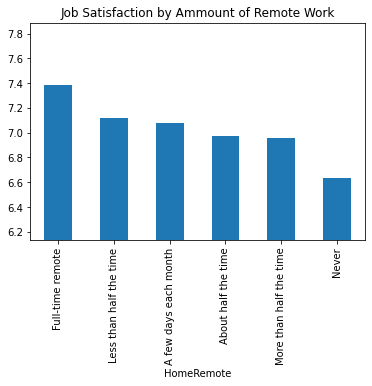

In [5]:
y_range = 0.5
plt.ylim(job_satisfaction.min() - y_range, job_satisfaction.max() + y_range)
plt.title('Job Satisfaction by Ammount of Remote Work')
(job_satisfaction).plot(kind="bar")